In [2]:
import numpy as np
import os

In [13]:
base_dir = '/content'

model_cnn_3d_history = np.load(os.path.join(base_dir, '3d_cnn_clean_v1_history.npy'), allow_pickle=True)
model_cnn_lstm_history = np.load(os.path.join(base_dir, 'cnn_lstm_clean_v6_history.npy'), allow_pickle=True)
model_vgg16_lstm_history = np.load(os.path.join(base_dir, 'vgg_lstm_attn_clean_v1_history.npy'), allow_pickle=True)
model_vgg16_lstm_attn_history = np.load(os.path.join(base_dir, 'vgg_lstm_attn_clean_v1_history.npy'), allow_pickle=True)
model_hrnet_lstm_history = np.load(os.path.join(base_dir, 'hrnet_lstm_64_dense_d_32_d_8.npy'), allow_pickle=True)
model_hrnet_lstm_attn_history = np.load(os.path.join(base_dir, 'hrnet_lstm_64_attn_dense_d_32_d_8.npy'), allow_pickle=True)

## Training / Validation Accuracy & Loss

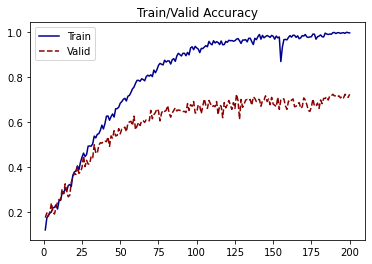

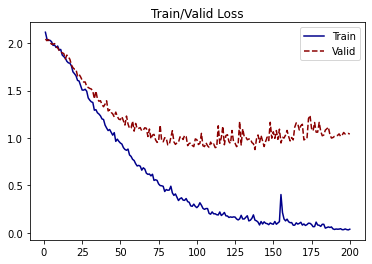

In [17]:
import matplotlib.pyplot as plt

history = model_vgg16_lstm_attn_history[()]

acc=history["accuracy"]
val_acc=history["val_accuracy"]
loss=history["loss"]
val_loss=history["val_loss"]
epoch_stop = len(acc)
epochs=np.arange(1, epoch_stop+1)

plt.plot(epochs, acc, label = "Train", color = 'darkblue')
plt.plot(epochs, val_acc, label = "Valid", linestyle="--", color = 'darkred')
plt.legend()
plt.title('Train/Valid Accuracy')
plt.show()

plt.plot(epochs, loss, label = "Train", color = 'darkblue')
plt.plot(epochs, val_loss, label = "Valid", linestyle="--", color = 'darkred')
plt.legend()
plt.title('Train/Valid Loss')
plt.show()

## Training accuracy

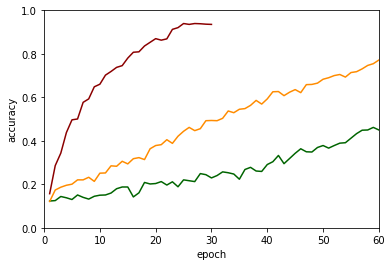

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

epoch_stop = 60
epochs=np.arange(1, epoch_stop+1)

acc1 = model_cnn_lstm_history[()]["accuracy"][:epoch_stop]
#acc2 = model_cnn_3d_history[()]["accuracy"][:epoch_stop]
acc3 = model_vgg16_lstm_history[()]["accuracy"][:epoch_stop]
acc4 = model_hrnet_lstm_history[()]["accuracy"][:epoch_stop]

acc1 = np.pad(acc1, (0,epoch_stop-len(acc1)), 'constant', constant_values=None)
#acc2 = np.pad(acc2, (0,epoch_stop-len(acc2)), 'constant', constant_values=None)
acc3 = np.pad(acc3, (0,epoch_stop-len(acc3)), 'constant', constant_values=None)
acc4 = np.pad(acc4, (0,epoch_stop-len(acc4)), 'constant', constant_values=None)

plt.plot(epochs, acc1, label = "CNN + LSTM (Baseline 1)", color = 'darkgreen')
#plt.plot(epochs, acc2, label = "Conv-3D (Baseline 2)", color = 'darkblue')
plt.plot(epochs, acc3, label = "VGG-16 Features + LSTM", color = 'darkorange')
plt.plot(epochs, acc4, label = "HRNet Features + LSTM", color = 'darkred')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axis([0, 60, 0, 1])
plt.show()


## Validation accuracy

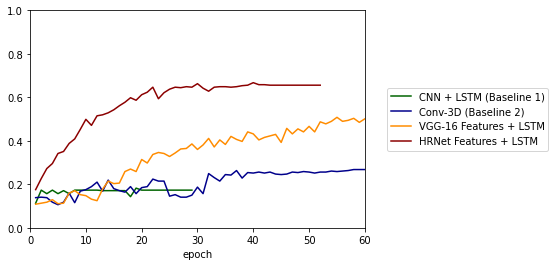

In [ ]:
import matplotlib.pyplot as plt

epoch_stop = 60
epochs=np.arange(1, epoch_stop+1)

acc1 = model_cnn_lstm_history[()]["val_accuracy"]
acc2 = model_cnn_3d_history[()]["val_accuracy"]
acc3 = model_vgg16_lstm_history[()]["val_accuracy"]
acc4 = model_hrnet_lstm_history[()]["val_accuracy"]

acc1 = np.pad(acc1, (0,epoch_stop-len(acc1)), 'constant', constant_values=None)
acc2 = np.pad(acc2, (0,epoch_stop-len(acc2)), 'constant', constant_values=None)
acc3 = np.pad(acc3, (0,epoch_stop-len(acc3)), 'constant', constant_values=None)
acc4 = np.pad(acc4, (0,epoch_stop-len(acc4)), 'constant', constant_values=None)

plt.plot(epochs, acc1, label = "CNN + LSTM (Baseline 1)", color = 'darkgreen')
plt.plot(epochs, acc2, label = "Conv-3D (Baseline 2)", color = 'darkblue')
plt.plot(epochs, acc3, label = "VGG-16 Features + LSTM", color = 'darkorange')
plt.plot(epochs, acc4, label = "HRNet Features + LSTM", color = 'darkred')
plt.xlabel("epoch")
plt.axis([0, 60, 0, 1])
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()
